In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DataSets/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import cluster,datasets,mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle,islice

In [6]:
read_data = pd.read_csv('iris.csv')
read_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
dataSet = read_data
X = dataSet.drop(['species'], axis=1)

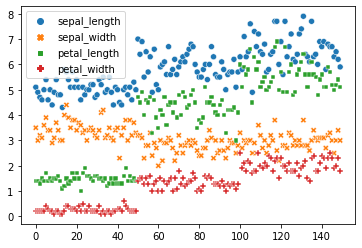

In [9]:
sns.scatterplot(data=X);

**Taking number of clusters = 2**

In [10]:
Kmean = KMeans(n_clusters=2)
y_kmeans = Kmean.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [11]:
cen = Kmean.cluster_centers_
cen

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

**Scatter plot between Petal length and Petal width**

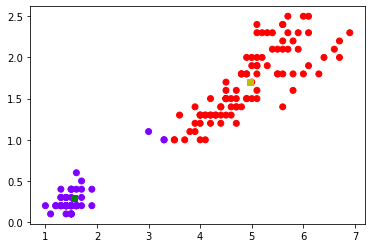

In [17]:
a1 = X['petal_length']
a2 = X['petal_width']
plt.scatter(a1, a2, c =y_kmeans, cmap='rainbow')
plt.scatter([1.56226415], [0.28867925],c='g',marker='s')
plt.scatter([4.95876289], [1.69587629],c='y',marker='s');

**Scatter plot between Sepal length and Sepal width**

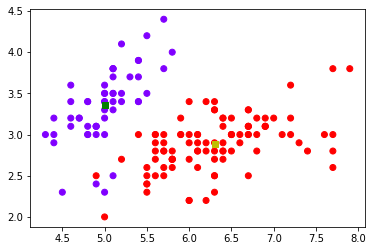

In [18]:
a1 = X['sepal_length']
a2 = X['sepal_width']
plt.scatter(a1, a2, c =y_kmeans, cmap='rainbow')
plt.scatter([5.00566038], [3.36037736],c='g',marker='s')
plt.scatter([6.30103093], [2.88659794],c='y',marker='s');

**Scatter plot between Petal length and Sepal length** 

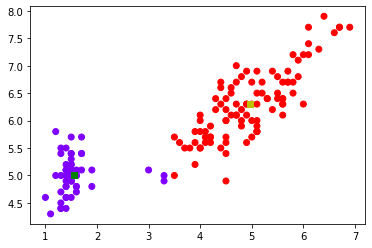

In [20]:
a1 = X['petal_length']
a2 = X['sepal_length']
plt.scatter(a1,a2, c=y_kmeans, cmap='rainbow')
plt.scatter([1.56226415],[5.00566038],c='g',marker='s')
plt.scatter([4.95876289],[6.30103093],c='y',marker='s');

**Scatter plot between Petal length and Sepal width**

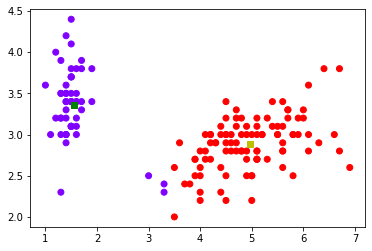

In [22]:
a1 = X['petal_length']
a2 = X['sepal_width']
plt.scatter(a1,a2,c=y_kmeans,cmap='rainbow')
plt.scatter([1.56226415],[3.36037736],c='g',marker='s')
plt.scatter([4.95876289],[2.88659794],c='y',marker='s');

**Scatter plot between Sepal length and petal width**

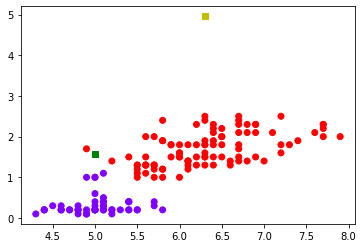

In [23]:
a1 = X['sepal_length']
a2 = X['petal_width']
plt.scatter(a1,a2,c=y_kmeans,cmap='rainbow')
plt.scatter([5.00566038],[1.56226415],c='g',marker='s')
plt.scatter([6.30103093],[4.95876289],c='y',marker='s')

**HTRU_2 Dataset**

In [24]:
read_data1 = pd.read_csv('HTRU_2.csv',header=None)
prePoc = False
X = read_data1.values[:,:-1]
Y = read_data1.values[:,-1]

In [25]:
if prePoc==True:
  XScaled = preprocessing.scale(X)
else:
   Xscaled=X

In [26]:
htru_2 = pd.DataFrame(Xscaled)
htru_2

,0,1,2,3,4,5,6,7
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [27]:
pca = PCA(n_components = 2)
reduce_data = pca.fit_transform(Xscaled)
print(reduce_data[:10])

[[-27.19108609 -29.67787512]
 [ 24.47621492  -6.02417549]
 [-39.9389202  -10.82804841]
 [-48.00082532 -29.83325727]
 [147.91943326  18.56254844]
 [ 28.0730528   -0.47467349]
 [373.72504326  35.29349845]
 [ 95.62295048  -8.92204215]
 [  5.39195038 -10.44385521]
 [-45.55946945 -11.73946448]]


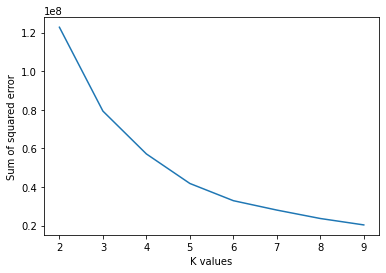

In [29]:
squ_sum_cri = []
k_range = range(2,10)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(Xscaled)
  squ_sum_cri.append(km.inertia_)

plt.plot(k_range,squ_sum_cri)
plt.xlabel('K values')
plt.ylabel('Sum of squared error');

**Taking K=2**

In [30]:
Kmean = KMeans(n_clusters=2)
clusters = Kmean.fit_predict(reduce_data)
print(clusters)

[0 0 0 ... 0 0 0]


In [31]:
centroids = Kmean.cluster_centers_
print(centroids)

[[-33.09926349  -2.11909963]
 [195.45421566  12.51347953]]


In [32]:
k_label = Kmean.labels_
print(k_label)

[0 0 0 ... 0 0 0]


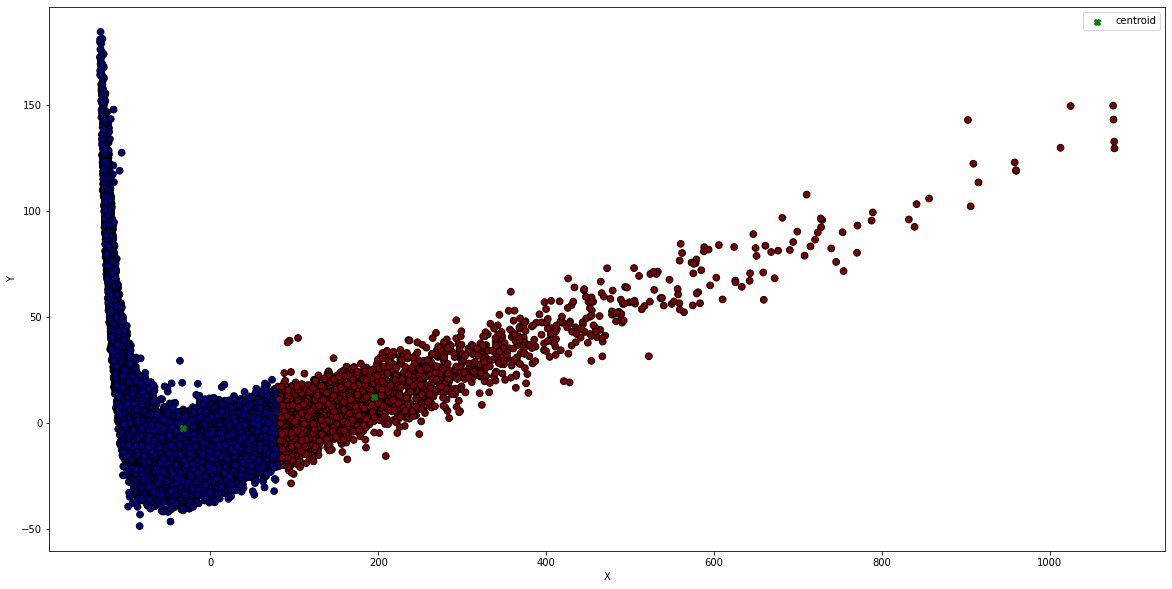

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(reduce_data[:,0],reduce_data[:,1],c = k_label, cmap = 'jet', edgecolors ='k', s=45)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(centroids[:,0],centroids[:,1], marker = 'X', color = 'g', label = 'centroid')
plt.legend();

**Taking K=3**

In [36]:
Kmean = KMeans(n_clusters=3)
clusters = Kmean.fit_predict(reduce_data)
print(clusters)

[0 2 0 ... 0 2 0]


In [37]:
centroids = Kmean.cluster_centers_
print(centroids)

[[-64.19859641   2.08391923]
 [327.15696962  30.90847234]
 [ 52.87997338  -7.27891903]]


In [38]:
k_label = Kmean.labels_
print(k_label)

[0 2 0 ... 0 2 0]


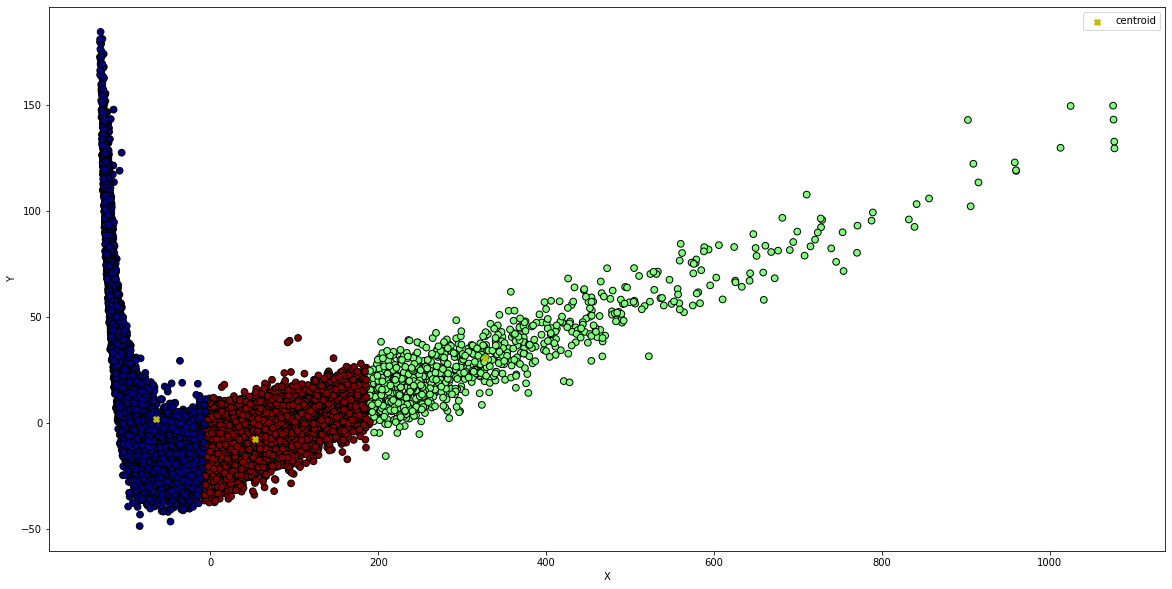

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(reduce_data[:,0],reduce_data[:,1],c = k_label, cmap = 'jet', edgecolors ='k', s=45)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(centroids[:,0],centroids[:,1], marker = 'X', color = 'y', label = 'centroid')
plt.legend();

**Silhouette Score**

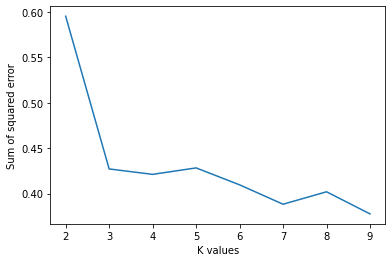

In [41]:
scores = []
for k in k_range:
  km = KMeans(n_clusters=k)
  pre = km.fit_predict(Xscaled)
  s = silhouette_score(Xscaled,pre)
  scores.append(s)
plt.plot(k_range,scores)
plt.xlabel("K values")
plt.ylabel("Sum of squared error");

In [42]:
for k in k_range:
  km = KMeans(n_clusters=k)
  pre = km.fit_predict(Xscaled)
  s = silhouette_score(Xscaled,pre)
  print(f" For the value of k={k} the silhouette score is :{s}")

 For the value of k=2 the silhouette score is :0.5949603908797125
 For the value of k=3 the silhouette score is :0.4261188036177509
 For the value of k=4 the silhouette score is :0.4328290547855592
 For the value of k=5 the silhouette score is :0.4292760697026811
 For the value of k=6 the silhouette score is :0.40968729135404985
 For the value of k=7 the silhouette score is :0.3883309341092134
 For the value of k=8 the silhouette score is :0.4022308456516411
 For the value of k=9 the silhouette score is :0.38092546611191325


**Toy dataset**

In [48]:
np.random.seed(0)
n_samples = 1600
dataset1,label1 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset2,label2 = datasets.make_moons(n_samples=n_samples, noise=.05)
dataset3,label3 = datasets.make_blobs(n_samples=n_samples, centers=4, cluster_std=0.60, random_state=0)
dataset4,label4 = np.random.rand(n_samples, 2),None

In [49]:
d = [dataset1,dataset2,dataset3,dataset4]
for i in d:
   prep = StandardScaler().fit_transform(i)
   print("*******DataSet *******")
   for k in k_range:
     kmeans = cluster.KMeans(n_clusters=k)
     clusters = kmeans.fit(prep)
     centroids = clusters.cluster_centers_
     l = clusters.labels_
     plt.scatter(prep[:,0],prep[:,1], c=l, cmap='jet', edgecolors='k',s=50)
     plt.xlabel("X")
     plt.ylabel("Y")
     plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [50]:
print(d)

[array([[-0.22632293,  0.46717207],
       [-0.79181925,  0.5163443 ],
       [ 0.47916808, -0.15494019],
       ...,
       [-0.54274153, -0.07135752],
       [-0.28860074, -0.98310092],
       [ 0.56500624, -0.68046341]]), array([[-0.35982267,  0.87366319],
       [ 0.90814397, -0.5583587 ],
       [ 0.56698794, -0.39284043],
       ...,
       [ 1.78218646, -0.0074989 ],
       [ 1.75327691, -0.13012032],
       [ 0.17891611,  1.00703468]]), array([[ 2.31988727,  1.00493938],
       [-1.63715745,  3.41265319],
       [-1.39924959,  7.48331843],
       ...,
       [ 2.24692662,  0.81499613],
       [-1.81102433,  7.99969769],
       [ 0.12183353,  4.0077954 ]]), array([[0.8328384 , 0.18675653],
       [0.42229915, 0.81926978],
       [0.73483397, 0.84438803],
       ...,
       [0.41601677, 0.24765569],
       [0.49302563, 0.88606469],
       [0.87594149, 0.67044361]])]
